<a href="https://colab.research.google.com/github/secoxx/IE423/blob/main/task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Initialize

In [107]:
pip install plotly

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn import linear_model


## Load Data

In [109]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [110]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/task 1/final_data.csv')

In [111]:
df.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [112]:
df.describe(include='all')

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
count,10754,10754,10754,10754,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,...,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000,10754.000000
unique,10754,374,10584,16,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,/david-de-gea/profil/spieler/59377,Daejeon Hana Citizen,Paulinho,Defender Centre-Back,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,46,6,1821,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,...,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,2.713223,0.307513
std,NaN,NaN,NaN,NaN,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,...,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.986356,0.461485
min,NaN,NaN,NaN,NaN,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,NaN,NaN,NaN,NaN,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,...,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,2.000000,0.000000
50%,NaN,NaN,NaN,NaN,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,...,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,3.000000,0.000000
75%,NaN,NaN,NaN,NaN,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,...,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,4.000000,1.000000


## Explore Data

### Option 2: EDA in Python

In [113]:
df.isna().sum()

player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

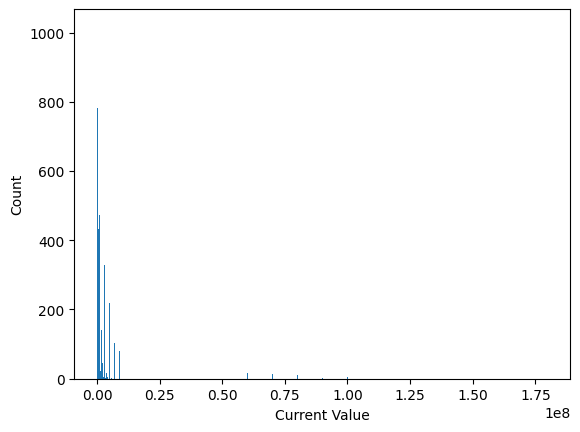

In [114]:
# Set data fields
y = df.loc[:,'current_value']

# Set histogram parameters
binwidth = 100000
binrange=np.arange(min(y), max(y) + binwidth, binwidth)

# Show plot
plt.hist(y, bins=binrange)
plt.xlabel('Current Value')
plt.ylabel('Count')
plt.show()

In [115]:
df.corr(numeric_only=True)

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
height,1.000000,0.063652,0.060641,-0.055962,-0.202441,-0.037974,-0.005112,-0.005693,0.333092,0.044366,0.132887,0.059392,0.054902,0.013976,0.040535,0.036776,-0.378333,-0.381728
age,0.063652,1.000000,0.139846,-0.034805,-0.024156,0.007085,0.015529,0.003074,0.083343,0.039064,0.169020,0.324267,0.343029,0.363478,-0.050156,0.123468,-0.107469,-0.047808
appearance,0.060641,0.139846,1.000000,0.131469,0.157186,-0.023092,-0.007436,-0.024514,-0.101384,-0.032515,0.945365,0.127369,0.147528,0.222139,0.419656,0.418394,0.129357,0.038713
goals,-0.055962,-0.034805,0.131469,1.000000,0.218266,-0.012826,-0.013974,-0.013940,-0.158107,-0.025811,0.050863,0.037527,0.041696,0.099617,0.121574,0.129037,0.434600,-0.004581
assists,-0.202441,-0.024156,0.157186,0.218266,1.000000,-0.004430,0.019551,-0.013189,-0.180607,-0.029460,0.081136,0.039431,0.049383,0.091569,0.137415,0.145407,0.324714,0.177580
yellow cards,-0.037974,0.007085,-0.023092,-0.012826,-0.004430,1.000000,0.028739,-0.003007,-0.093675,-0.017122,-0.039652,0.011461,0.012892,-0.009052,-0.011766,-0.009772,0.077185,0.010097
second yellow cards,-0.005112,0.015529,-0.007436,-0.013974,0.019551,0.028739,1.000000,-0.002562,-0.045840,-0.006770,-0.010411,0.003772,0.007090,-0.015231,-0.013889,-0.014155,0.005766,-0.007259
red cards,-0.005693,0.003074,-0.024514,-0.013940,-0.013189,-0.003007,-0.002562,1.000000,-0.004584,-0.001778,-0.024402,-0.003650,-0.004764,-0.007886,-0.010171,-0.007257,0.004614,-0.007026
goals conceded,0.333092,0.083343,-0.101384,-0.158107,-0.180607,-0.093675,-0.045840,-0.004584,1.000000,0.067466,-0.004267,-0.030926,-0.042140,-0.011520,-0.063529,-0.061183,-0.517020,-0.198351
clean sheets,0.044366,0.039064,-0.032515,-0.025811,-0.029460,-0.017122,-0.006770,-0.001778,0.067466,1.000000,-0.020190,0.001275,0.005611,0.002996,-0.011684,-0.008302,-0.084334,-0.032354


We'll drop the features that have correlation with current_value < 0.05, because then it means the p value is low enough so we can reject the hypothesis that two features are correlated. Next we'll create a scatter plot matrix with all the remaining values to get a grasp of the correlations.

In [116]:
import plotly.express as px
fig = px.scatter_matrix(df, dimensions = ["age",	"appearance",	"goals",	"assists", "minutes played","days_injured","games_injured","award","current_value","highest_value","position_encoded"])
fig.show()

In [117]:
df = df.loc[:, df.columns.intersection(["age",	"appearance",	"goals",	"assists", "minutes played","days_injured","games_injured","award","current_value","highest_value","position_encoded","position"])]
df

,position,age,appearance,goals,assists,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded
0,Goalkeeper,32.0,104,0.000000,0.000000,9390,42,5,13,15000000,70000000,1
1,Goalkeeper,30.0,15,0.000000,0.000000,1304,510,58,1,1500000,22000000,1
2,Goalkeeper,37.0,4,0.000000,0.000000,292,697,84,4,600000,6000000,1
3,Defender Centre-Back,25.0,82,0.028090,0.056180,6408,175,22,9,50000000,50000000,2
4,Defender Centre-Back,30.0,63,0.017889,0.017889,5031,238,51,21,40000000,80000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...
10749,Attack-RightWinger,20.0,16,0.175953,0.087977,1023,0,0,0,75000,75000,4
10750,Attack Centre-Forward,24.0,26,0.372671,0.186335,1449,102,18,0,300000,300000,4
10751,Attack Centre-Forward,19.0,20,0.375000,0.000000,960,0,0,0,50000,50000,4
10752,Attack Centre-Forward,20.0,17,0.312139,0.104046,865,0,0,0,50000,50000,4


In [118]:

fig = make_subplots(rows=1, cols=2)

fig.add_trace(go.Histogram(x=df.loc[:,'age']), row=1, col=1)
fig.add_trace(go.Histogram(x=df.loc[:,'appearance']), row=1, col=2)
fig.update_xaxes(title_text="Age", row=1, col=1)
fig.update_xaxes(title_text="Appearance", row=1, col=2)
fig.update_yaxes(title_text="Frequency", row=1, col=1)
fig.update_layout(title_text="Histograms")

fig.show()

In [119]:

fig = make_subplots(rows=1, cols=2)

fig.add_trace(go.Scatter(x=df.loc[:,'age'],y=df.loc[:,'current_value'],mode='markers'), row=1, col=1)
fig.add_trace(go.Scatter(x=df.loc[:,'appearance'],y=df.loc[:,'current_value'],mode='markers'), row=1, col=2)
fig.update_xaxes(title_text="Age", row=1, col=1)
fig.update_xaxes(title_text="Appearance", row=1, col=2)
fig.update_yaxes(title_text="Current Value", row=1, col=1)
fig.update_layout(title_text="Current Value vs. Age & Appearance")

# Compute trendlines
fig_px_age = px.scatter(df, x='age', y='current_value', trendline='ols')
fig_px_appearance = px.scatter(df, x='appearance', y='current_value', trendline='ols')

# Extract trendline data
trendline_age = fig_px_age.data[1]
trendline_appearance = fig_px_appearance.data[1]

# Add trendlines to subplots
fig.add_trace(trendline_age, row=1, col=1)
fig.add_trace(trendline_appearance, row=1, col=2)

fig.show()

It looks like as appearance increases and age decreases, current value increases. Next, we'll plot some scatterplots with features that looks relevant based on the correlation matrix and intuition.

In [120]:
fig = make_subplots(rows=3, cols=2)

fig.add_trace(go.Scatter(x=df.loc[:,'goals'],y=df.loc[:,'current_value'],mode='markers'), row=1, col=1)
fig.add_trace(go.Scatter(x=df.loc[:,'assists'],y=df.loc[:,'current_value'],mode='markers'), row=1, col=2)
fig.update_xaxes(title_text="Goals", row=1, col=1)
fig.update_xaxes(title_text="Assists", row=1, col=2)

fig.add_trace(go.Scatter(x=df.loc[:,'minutes played'],y=df.loc[:,'current_value'],mode='markers'), row=2, col=1)
fig.add_trace(go.Scatter(x=df.loc[:,'award'],y=df.loc[:,'current_value'],mode='markers'), row=2, col=2)
fig.update_xaxes(title_text="Minutes Played", row=2, col=1)
fig.update_xaxes(title_text="Award", row=2, col=2)
fig.update_yaxes(title_text="Current Value", row=2, col=1)

fig.add_trace(go.Scatter(x=df.loc[:,'days_injured'],y=df.loc[:,'current_value'],mode='markers'), row=3, col=1)
fig.add_trace(go.Scatter(x=df.loc[:,'games_injured'],y=df.loc[:,'current_value'],mode='markers'), row=3, col=2)
fig.update_xaxes(title_text="Days Injured", row=3, col=1)
fig.update_xaxes(title_text="Games Injured", row=3, col=2)

fig.update_layout(height=700,title_text='Current Value vs. Features')

fig.show()

First we'll analyze how goals and assists affect current value, because from the scatterplots it looks like there's no linear relation but we'd expect such a relation. However, as it can be seen below, most data points are from midfield,defence players and goalkeepers. Attack players are the minority compared to all of the others.

In [121]:
df['position'].value_counts()

position
Defender Centre-Back          1821
Attack Centre-Forward         1353
Goalkeeper                    1229
midfield-CentralMidfield      1149
midfield-DefensiveMidfield     900
Defender Right-Back            867
Defender Left-Back             807
midfield-AttackingMidfield     769
Attack-RightWinger             717
Attack-LeftWinger              714
midfield-RightMidfield         102
midfield-LeftMidfield          100
midfield                        75
Attack-SecondStriker            65
Attack                          53
Defender                        33
Name: count, dtype: int64

Among attack players, we'll analyze how their goals affect their value; but as it can be seen below, it looks like there's no linear relationship between the number of goals and current value. However it looks like Centre Forwards produce more goals and RightWingers produce the least goals. When the trendline is fitted, it still showcases a line and also it's important to note that there was correlation.

In [122]:
q = df["goals"].quantile(0.99)
dfq = df[df["goals"]<q]
q = df["current_value"].quantile(0.99)
dfq = dfq[dfq["current_value"]<q]
attack = ["Attack Centre-Forward", "Attack-RightWinger","Attack-LeftWinger","Attack-SecondStriker","Attack"]
df_attack = dfq[dfq['position'].isin(attack)]
fig = px.scatter(df_attack,x="goals",y="current_value",color="position",trendline='ols')
fig.show()

Similarly, there's no direct linear relationship between assists and current value. However, as it was the case with goals; there was a lot of 0 values which makes the dataset skewed. As it can be seen below, almost half of the goals and assists are 0 values.

In [123]:
assists_count = (df['assists'] == 0).sum()
goals_count = (df['goals'] == 0).sum()
print(f"Assists: {assists_count}")
print(f"Goals: {goals_count}")
print(len(df.axes[0]))

Assists: 4539
Goals: 4354
10754


In [124]:
q = df["assists"].quantile(0.99)
dfq = df[df["assists"]<q]
q = df["current_value"].quantile(0.99)
dfq = dfq[dfq["current_value"]<q]
attack = ["Attack Centre-Forward", "Attack-RightWinger","Attack-LeftWinger","Attack-SecondStriker","Attack"]
df_attack = dfq[dfq['position'].isin(attack)]
fig = px.scatter(df_attack,x="assists",y="current_value",color="position",trendline='ols')
fig.show()

However, when we exclude the 0 values, the picture doesn't change much.

In [125]:
df_nonzero = df[df['assists'] != 0]
attack = ["Attack Centre-Forward", "Attack-RightWinger","Attack-LeftWinger","Attack-SecondStriker","Attack"]
df_attack = df_nonzero[df_nonzero['position'].isin(attack)]
fig = px.scatter(df_attack,x="assists",y="current_value",color="position",trendline='ols')
fig.show()

Let's analyze days and games injured next. In the correlation matrix, we saw that days and games injured are correlated (their correlation was 0.95), therefore it's enough to analyze one. Let's analyze days injured. As it can be seen below, it looks like there's a negative correlation between days injured and current value.

In [126]:
fig = px.scatter(df,x="days_injured",y="current_value")
fig.show()

The next feature we'll look into is minutes played, as expected; there seems to be a linear relation between minutes played and current value.

In [127]:
df_nonzero = df[df['minutes played'] != 0]
fig = px.scatter(df_nonzero,x="minutes played",y="current_value",trendline='ols',trendline_color_override='red')
fig.show()

## Fitting a Linear Regression Model

Since highest value and current value are highly correlated, we won't analyze highest value. We'll include goals, assists, minutes played, days injured and appearance in the linear regression model since those seem to be having a linear relationship.

In [128]:
X = df.loc[:,['goals','assists','minutes played','days_injured','appearance']]
Y = df.loc[:,['current_value']]
regr = linear_model.LinearRegression()
regr.fit(X, Y)

LinearRegression()

In [129]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 [-2167956.25567753]
Coefficients: 
 [[2.90413029e+06 5.07424056e+06 1.50071675e+03 2.92331502e+03
  2.56038998e+04]]


In [130]:
Goals = df['goals'].mean()
Assists = df['assists'].mean()
Minutes_Played = df['minutes played'].mean()
Days_Injured = df['days_injured'].mean()
Appearance = df['appearance'].mean()
print('Predicted Tip: \n', regr.predict([[Goals, Assists, Minutes_Played, Days_Injured, Appearance]]))

Predicted Tip: 
 [[3622970.98753952]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

